In [2]:
# Tratamiento y manipulación de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Plot
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Define the plot size
# ==============================================================================
from pylab import rcParams
rcParams['figure.figsize'] = (18,7)

# Hide warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/narencastellon/Serie-de-tiempo-con-Machine-Learning/refs/heads/main/Data/Electric_Production.csv", parse_dates= ["DATE"])
df

,DATE,Value
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151
...,...,...
392,2017-09-01,98.6154
393,2017-10-01,93.6137
394,2017-11-01,97.3359
395,2017-12-01,114.7212


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    397 non-null    datetime64[ns]
 1   Value   397 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 KB


# Análisis univariado

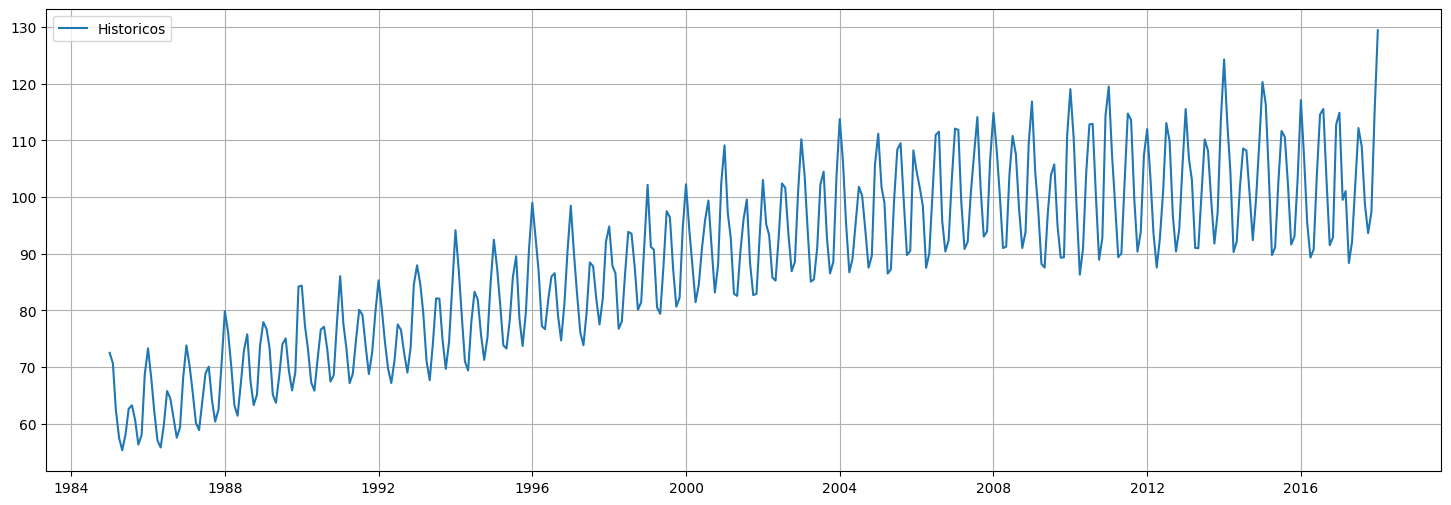

In [5]:
plt.figure(figsize= (18,6))
plt.plot(df["DATE"], df["Value"], label = "Historicos")
plt.legend()
plt.grid()
plt.show()

Text(0.5, 1.0, 'Distribución de la Variable')

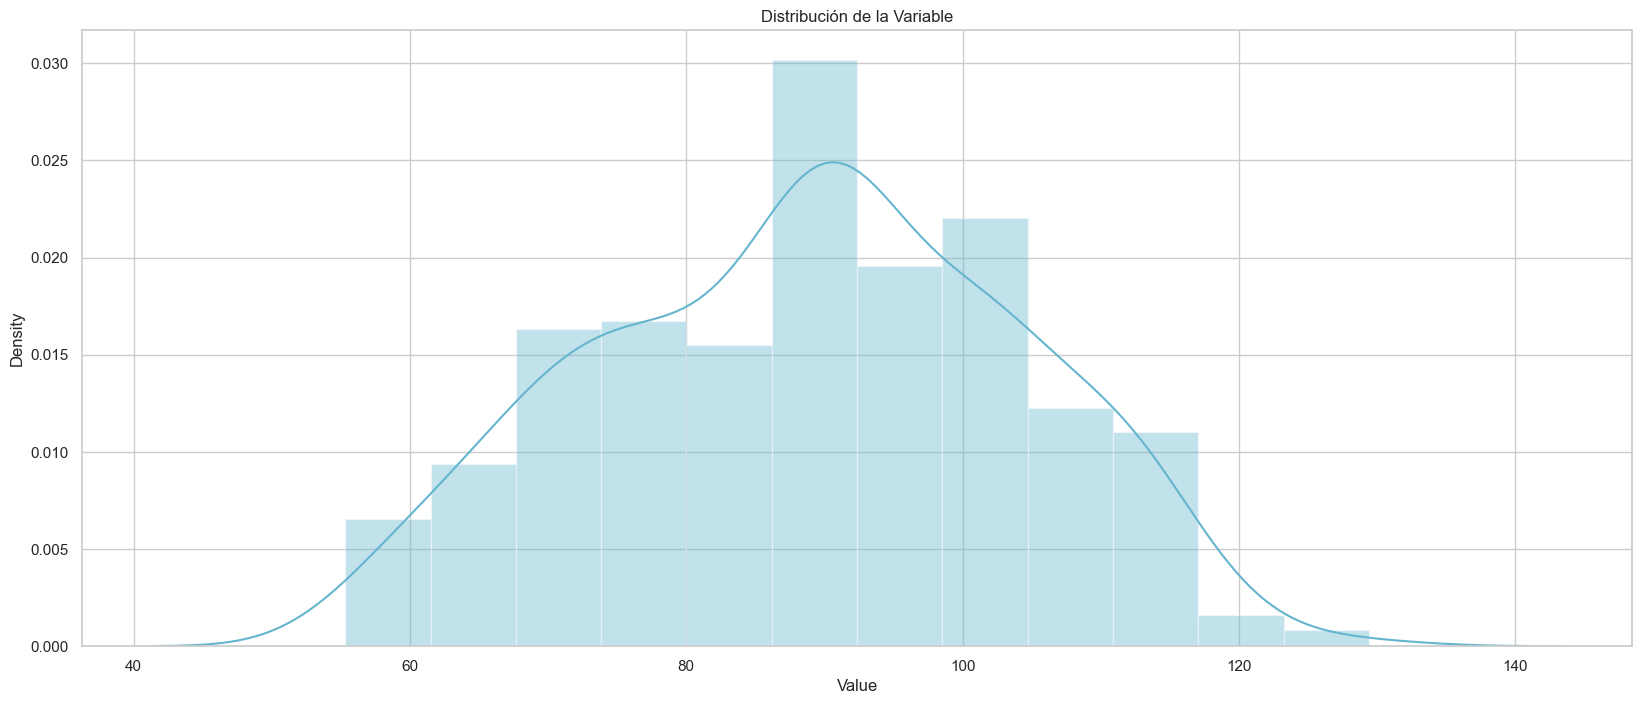

In [6]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(20, 8))
ax = sns.distplot(df['Value'], kde = True, color = 'c')
plt.title("Distribución de la Variable")

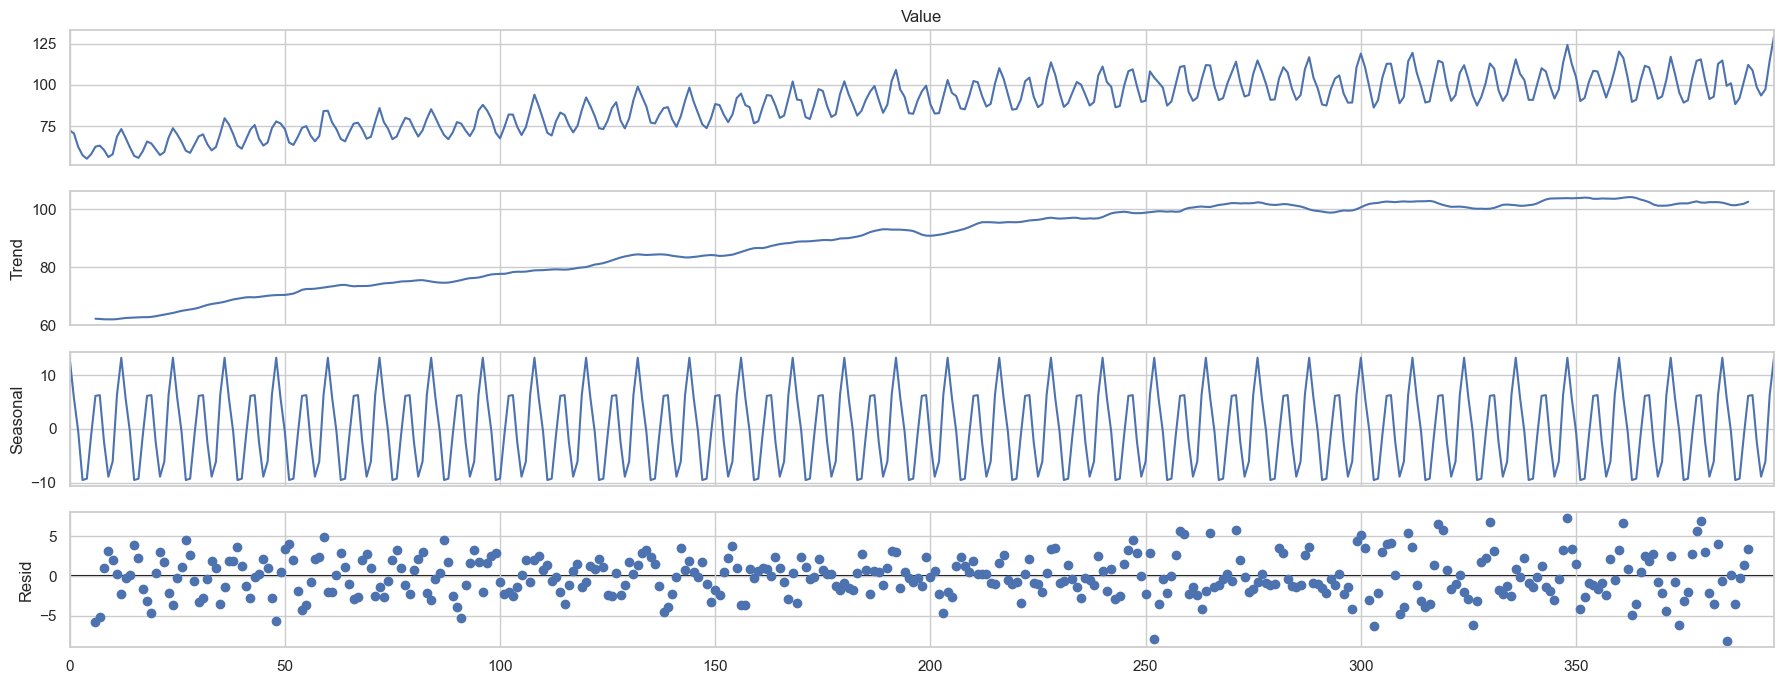

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
a = seasonal_decompose(df["Value"], model = "additive", period= 12)
a.plot();

## `Division de los datos en etiquetas`

In [9]:
# Definir las caractericas y crear nuevas

X = df["DATE"]
y = df["Value"]

# Crear nuevas caracteristicas de estacionalidades

df["year"] = df["DATE"].dt.year
df["month"] = df["DATE"].dt.month
df["day"] = df["DATE"].dt.day

# Guardar una copia
data = df.copy()

data

,DATE,Value,year,month,day
0,1985-01-01,72.5052,1985,1,1
1,1985-02-01,70.6720,1985,2,1
2,1985-03-01,62.4502,1985,3,1
3,1985-04-01,57.4714,1985,4,1
4,1985-05-01,55.3151,1985,5,1
...,...,...,...,...,...
392,2017-09-01,98.6154,2017,9,1
393,2017-10-01,93.6137,2017,10,1
394,2017-11-01,97.3359,2017,11,1
395,2017-12-01,114.7212,2017,12,1


In [11]:
data = data.set_index("DATE")
data

,Value,year,month,day
DATE,,,,
1985-01-01,72.5052,1985,1,1
1985-02-01,70.6720,1985,2,1
1985-03-01,62.4502,1985,3,1
1985-04-01,57.4714,1985,4,1
1985-05-01,55.3151,1985,5,1
...,...,...,...,...
2017-09-01,98.6154,2017,9,1
2017-10-01,93.6137,2017,10,1
2017-11-01,97.3359,2017,11,1


## `Lags`

In [12]:
num_lags = 10
for lag in range(1, num_lags +1):
    data[f'lag{lag}'] =  data["Value"].shift(lag)

data.dropna(inplace = True)

data

,Value,year,month,day,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10
DATE,,,,,,,,,,,,,,
1985-11-01,58.0005,1985,11,1,56.3154,60.5846,63.2485,62.6202,58.0904,55.3151,57.4714,62.4502,70.6720,72.5052
1985-12-01,68.7145,1985,12,1,58.0005,56.3154,60.5846,63.2485,62.6202,58.0904,55.3151,57.4714,62.4502,70.6720
1986-01-01,73.3057,1986,1,1,68.7145,58.0005,56.3154,60.5846,63.2485,62.6202,58.0904,55.3151,57.4714,62.4502
1986-02-01,67.9869,1986,2,1,73.3057,68.7145,58.0005,56.3154,60.5846,63.2485,62.6202,58.0904,55.3151,57.4714
1986-03-01,62.2221,1986,3,1,67.9869,73.3057,68.7145,58.0005,56.3154,60.5846,63.2485,62.6202,58.0904,55.3151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-01,98.6154,2017,9,1,108.9312,112.1538,102.1532,92.0805,88.3530,101.0396,99.4901,114.8505,112.7694,92.8900
2017-10-01,93.6137,2017,10,1,98.6154,108.9312,112.1538,102.1532,92.0805,88.3530,101.0396,99.4901,114.8505,112.7694
2017-11-01,97.3359,2017,11,1,93.6137,98.6154,108.9312,112.1538,102.1532,92.0805,88.3530,101.0396,99.4901,114.8505


In [13]:
data.columns

Index(['Value', 'year', 'month', 'day', 'lag1', 'lag2', 'lag3', 'lag4', 'lag5',
       'lag6', 'lag7', 'lag8', 'lag9', 'lag10'],
      dtype='object')

In [14]:
X = data[['year', 'month', 'day', 'lag1', 'lag2', 'lag3', 'lag4', 'lag5',
       'lag6', 'lag7', 'lag8', 'lag9', 'lag10']]

y = data["Value"]

In [15]:
X

,year,month,day,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10
DATE,,,,,,,,,,,,,
1985-11-01,1985,11,1,56.3154,60.5846,63.2485,62.6202,58.0904,55.3151,57.4714,62.4502,70.6720,72.5052
1985-12-01,1985,12,1,58.0005,56.3154,60.5846,63.2485,62.6202,58.0904,55.3151,57.4714,62.4502,70.6720
1986-01-01,1986,1,1,68.7145,58.0005,56.3154,60.5846,63.2485,62.6202,58.0904,55.3151,57.4714,62.4502
1986-02-01,1986,2,1,73.3057,68.7145,58.0005,56.3154,60.5846,63.2485,62.6202,58.0904,55.3151,57.4714
1986-03-01,1986,3,1,67.9869,73.3057,68.7145,58.0005,56.3154,60.5846,63.2485,62.6202,58.0904,55.3151
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-01,2017,9,1,108.9312,112.1538,102.1532,92.0805,88.3530,101.0396,99.4901,114.8505,112.7694,92.8900
2017-10-01,2017,10,1,98.6154,108.9312,112.1538,102.1532,92.0805,88.3530,101.0396,99.4901,114.8505,112.7694
2017-11-01,2017,11,1,93.6137,98.6154,108.9312,112.1538,102.1532,92.0805,88.3530,101.0396,99.4901,114.8505


In [16]:
y

DATE
1985-11-01     58.0005
1985-12-01     68.7145
1986-01-01     73.3057
1986-02-01     67.9869
1986-03-01     62.2221
                ...   
2017-09-01     98.6154
2017-10-01     93.6137
2017-11-01     97.3359
2017-12-01    114.7212
2018-01-01    129.4048
Name: Value, Length: 387, dtype: float64

## `Dividir los datos en Train y Test`

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, shuffle= False)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((309, 13), (78, 13), (309,), (78,))

In [20]:
X_train

,year,month,day,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10
DATE,,,,,,,,,,,,,
1985-11-01,1985,11,1,56.3154,60.5846,63.2485,62.6202,58.0904,55.3151,57.4714,62.4502,70.6720,72.5052
1985-12-01,1985,12,1,58.0005,56.3154,60.5846,63.2485,62.6202,58.0904,55.3151,57.4714,62.4502,70.6720
1986-01-01,1986,1,1,68.7145,58.0005,56.3154,60.5846,63.2485,62.6202,58.0904,55.3151,57.4714,62.4502
1986-02-01,1986,2,1,73.3057,68.7145,58.0005,56.3154,60.5846,63.2485,62.6202,58.0904,55.3151,57.4714
1986-03-01,1986,3,1,67.9869,73.3057,68.7145,58.0005,56.3154,60.5846,63.2485,62.6202,58.0904,55.3151
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-03-01,2011,3,1,107.3753,119.4880,114.3266,92.7750,88.9251,100.1209,112.9014,112.8066,104.3538,90.8364
2011-04-01,2011,4,1,99.1028,107.3753,119.4880,114.3266,92.7750,88.9251,100.1209,112.9014,112.8066,104.3538
2011-05-01,2011,5,1,89.3583,99.1028,107.3753,119.4880,114.3266,92.7750,88.9251,100.1209,112.9014,112.8066


In [21]:
y_train

DATE
1985-11-01     58.0005
1985-12-01     68.7145
1986-01-01     73.3057
1986-02-01     67.9869
1986-03-01     62.2221
                ...   
2011-03-01     99.1028
2011-04-01     89.3583
2011-05-01     90.0698
2011-06-01    102.8204
2011-07-01    114.7068
Name: Value, Length: 309, dtype: float64

# `Modelo Base`

vamos a usar el modelo `Random Forest`

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
# Creamos el modelo base
model_base = RandomForestRegressor().fit(X_train, y_train)

# Forecast
pred_rf = model_base.predict(X_test)
pred_rf

array([110.012731,  98.968409,  90.00873 ,  91.361493, 108.946287,
       115.159406, 110.389486,  98.993391,  89.843131,  91.007033,
       106.555469, 110.690931, 105.083347,  94.215639,  89.430069,
        92.311589, 109.48253 , 113.903026, 108.654752,  98.874618,
        89.713959,  94.598183, 104.188108, 110.054463, 109.938779,
       101.018152,  91.946574,  91.757205, 108.39447 , 115.053845,
       108.228464,  99.429498,  91.608376, 101.795145, 105.299774,
       111.464373, 110.232456, 102.246545,  91.675109,  92.50161 ,
       109.806646, 114.868279, 108.683092, 100.995869,  92.208081,
       102.294725, 103.831298, 112.205337, 110.754031, 102.756786,
        91.323039,  92.379125, 108.140696, 114.289669, 110.343148,
       101.091268,  92.017071,  90.455389, 103.760154, 112.406984,
       107.464894,  98.308973,  89.909095,  91.533377, 109.839964,
       115.548111, 109.152102, 101.111212,  92.146408,  90.109436,
       104.945019, 110.788507, 107.643283,  99.271189,  90.742

In [24]:
# Guardar forecast

forecast = pd.DataFrame(y_test)
forecast["RF-Base"] = pred_rf
forecast

,Value,RF-Base
DATE,,
2011-08-01,113.5958,110.012731
2011-09-01,99.4712,98.968409
2011-10-01,90.3566,90.008730
2011-11-01,93.8095,91.361493
2011-12-01,107.3312,108.946287
...,...,...
2017-09-01,98.6154,99.271189
2017-10-01,93.6137,90.742893
2017-11-01,97.3359,92.520507


## `Visualizar Forecast`

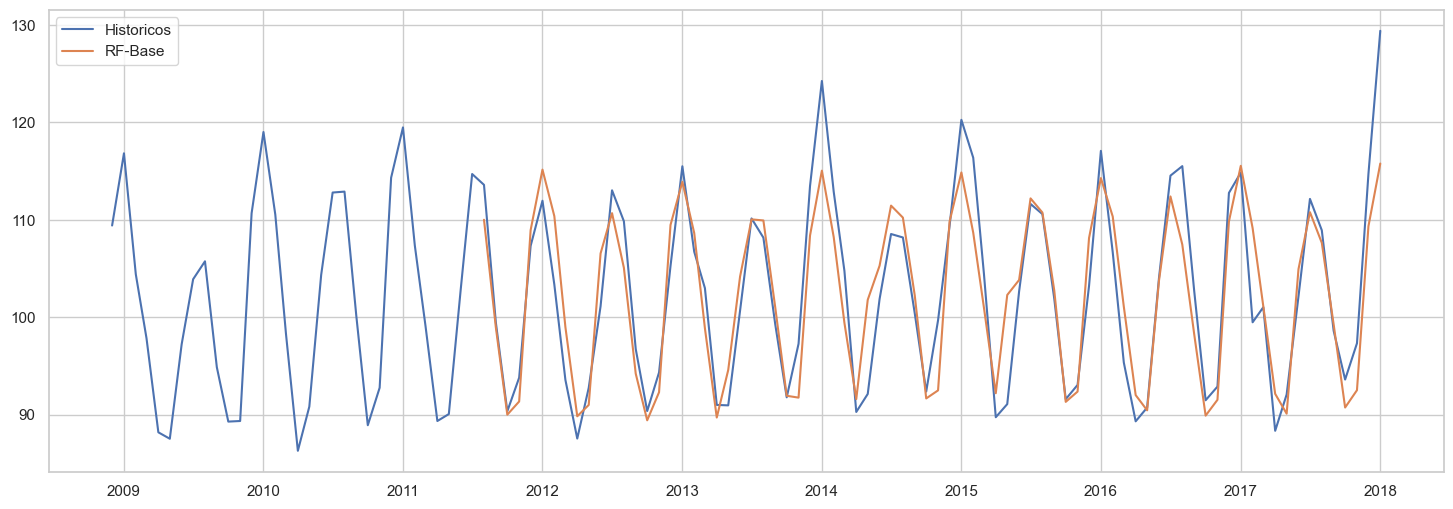

In [25]:
plt.figure(figsize= (18,6))
plt.plot(data.index[-110:], data["Value"][-110:], label = "Historicos")
plt.plot(forecast.index, forecast["RF-Base"], label = "RF-Base")
plt.legend()
plt.show()

## `Performance Model`

In [26]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print('Testing R2 Score: ', r2_score(y_test, pred_rf)*100)
print('Testing RMSE: ', np.sqrt(mean_squared_error(y_test, pred_rf)))
print('Testing MAE: ', mean_absolute_error(y_test, pred_rf))
print('Testing MSE: ', mean_squared_error(y_test, pred_rf))

Testing R2 Score:  80.18497567377622
Testing RMSE:  4.2687940047805535
Testing MAE:  3.2485643846153853
Testing MSE:  18.222602255250397


## `Randomized Search`

In [28]:
from sklearn.model_selection import RandomizedSearchCV

In [30]:
# Definir el espacio de busquedad
para_grid_rs = {
    'bootstrap': [True],
    'max_depth': range(2, 20, 1),
    'max_features': range(2, 8, 1),
    'min_samples_leaf': range(2, 5, 1),
    'min_samples_split': [8, 10, 12],
    'n_estimators':  range(100, 2000, 100),
    'criterion': ["squared_error", "r2"] 
}

In [31]:
# Crear modelo
clf = RandomForestRegressor()

# Crear el modelo del hiperparametro

modelo_rs = RandomizedSearchCV(estimator= clf, param_distributions= para_grid_rs, n_iter= 10, cv = 5, verbose= 1, n_jobs= -1)

modelo_rs.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'criterion': ['squared_error', 'r2'],
                                        'max_depth': range(2, 20),
                                        'max_features': range(2, 8),
                                        'min_samples_leaf': range(2, 5),
                                        'min_samples_split': [8, 10, 12],
                                        'n_estimators': range(100, 2000, 100)},
                   verbose=1)

In [32]:
print(f'Cuales son los mejores parametros encontrado: {modelo_rs.best_params_}')

Cuales son los mejores parametros encontrado: {'n_estimators': 1300, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': 6, 'max_depth': 10, 'criterion': 'squared_error', 'bootstrap': True}


In [33]:
best_grid_rs = modelo_rs.best_estimator_
best_grid_rs

RandomForestRegressor(max_depth=10, max_features=6, min_samples_leaf=4,
                      min_samples_split=8, n_estimators=1300)

## `Entrenar el modelo`

In [34]:
best_grid_rs.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features=6, min_samples_leaf=4,
                      min_samples_split=8, n_estimators=1300)

## `Forecast`

In [36]:
pred_rf_rs = best_grid_rs.predict(X_test)
pred_rf_rs

array([109.3395431 ,  98.75720679,  90.04664222,  91.49482385,
       107.19059048, 113.56285366, 109.91624121,  98.94844363,
        90.48476204,  91.31775334, 105.00986883, 110.31339992,
       105.36231857,  95.10663433,  89.63780684,  92.43498383,
       106.99725792, 112.09206964, 107.68779799,  98.80705133,
        93.03652394,  94.1629872 , 103.26261948, 110.0901477 ,
       109.53744901, 100.97915906,  92.42100246,  91.91738495,
       105.1139539 , 112.90928637, 108.07066971,  99.52705217,
        95.00885236,  99.57915485, 104.10738344, 110.4802442 ,
       109.92678714, 101.69835115,  92.72470732,  92.44235767,
       106.24730693, 112.93514347, 107.81161043, 100.07313138,
        95.8887065 ,  99.90550874, 103.36036511, 111.57402284,
       109.5678221 , 101.88154149,  93.27956918,  92.36222406,
       105.29174871, 113.31338328, 110.0927078 , 100.74003343,
        92.51164632,  91.22325227, 102.90140074, 111.63647049,
       107.5247696 ,  98.13611484,  91.637349  ,  91.90

In [38]:
forecast["RF_RandomizedSearchCV"] = pred_rf_rs
forecast

,Value,RF-Base,RF_RandomizedSearchCV
DATE,,,
2011-08-01,113.5958,110.012731,109.339543
2011-09-01,99.4712,98.968409,98.757207
2011-10-01,90.3566,90.008730,90.046642
2011-11-01,93.8095,91.361493,91.494824
2011-12-01,107.3312,108.946287,107.190590
...,...,...,...
2017-09-01,98.6154,99.271189,98.837342
2017-10-01,93.6137,90.742893,91.400006
2017-11-01,97.3359,92.520507,93.410774


## `Visualizar forecast con RandomizedSearchCV`

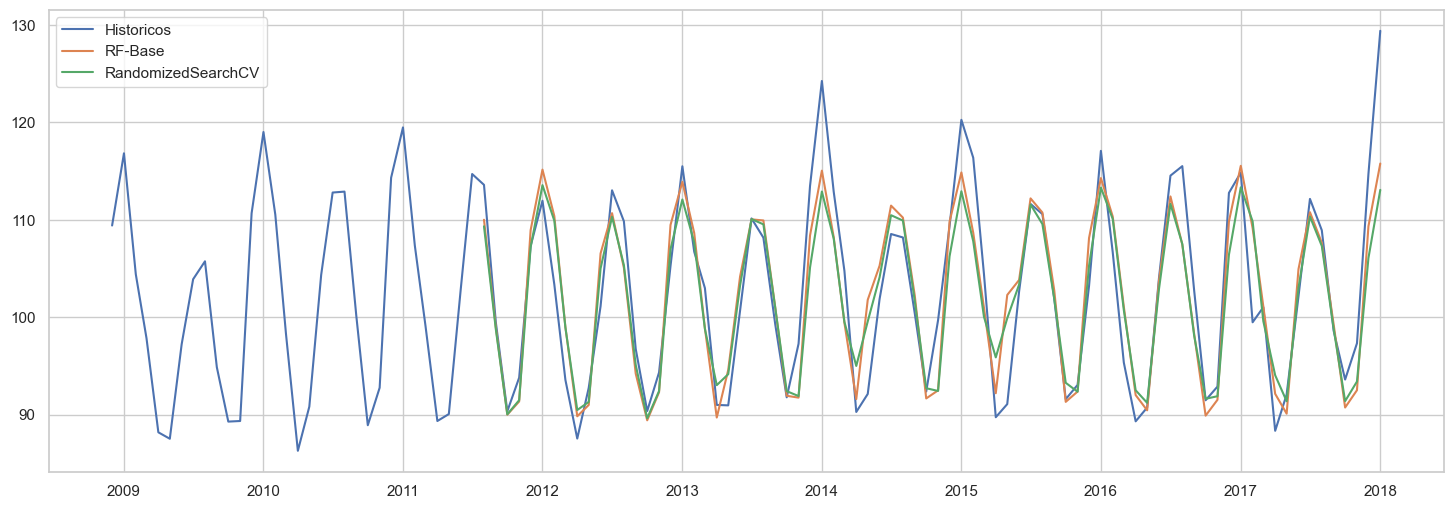

In [40]:
plt.figure(figsize= (18,6))
plt.plot(data.index[-110:], data["Value"][-110:], label = "Historicos")
plt.plot(forecast.index, forecast["RF-Base"], label = "RF-Base")
plt.plot(forecast.index, forecast["RF_RandomizedSearchCV"], label = "RandomizedSearchCV")
plt.legend()
plt.show()

## `Performance modelo Randomize Search`

In [41]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print('Testing R2 Score: ', r2_score(y_test, pred_rf_rs)*100)
print('Testing RMSE: ', np.sqrt(mean_squared_error(y_test, pred_rf_rs)))
print('Testing MAE: ', mean_absolute_error(y_test, pred_rf_rs))
print('Testing MSE: ', mean_squared_error(y_test, pred_rf_rs))

Testing R2 Score:  77.21224769584921
Testing RMSE:  4.57781921916732
Testing MAE:  3.400494562883309
Testing MSE:  20.956428803377687


## `Grid Seach`

In [46]:
from sklearn.model_selection import GridSearchCV

In [48]:
# Definir el espacio de busquedad
para_grid_gs = {
    'bootstrap': [True],
    'max_depth': range(2, 20, 1),
    'max_features': range(2, 8, 1),
    'min_samples_leaf': range(2, 5, 1),
    'min_samples_split': [8, 10, 12],
    'n_estimators':  range(100, 2000, 100),
    'criterion': ["squared_error", "r2"] 
}

In [49]:
# Crear modelo

clf2 = RandomForestRegressor()

# Crear modelo con hiperparametro
modelo_gs = GridSearchCV(estimator= clf2, param_grid = para_grid_gs, cv = 5, verbose= 1, n_jobs= -1)

# Entrenar
modelo_gs.fit(X_train, y_train)

Fitting 5 folds for each of 6048 candidates, totalling 30240 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'criterion': ['squared_error', 'r2'],
                         'max_depth': range(2, 10), 'max_features': range(2, 5),
                         'min_samples_leaf': range(2, 5),
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': range(100, 1500, 100)},
             verbose=1)

In [50]:
print(f'Cuales son los mejores parametros encontrado: {modelo_gs.best_params_}')

Cuales son los mejores parametros encontrado: {'bootstrap': True, 'criterion': 'squared_error', 'max_depth': 8, 'max_features': 4, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}


In [51]:
best_grid_gs = modelo_gs.best_estimator_
best_grid_gs

RandomForestRegressor(max_depth=8, max_features=4, min_samples_leaf=3,
                      min_samples_split=8)

In [52]:
best_grid_gs.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, max_features=4, min_samples_leaf=3,
                      min_samples_split=8)

In [53]:
pred_rf_gs = best_grid_gs.predict(X_test)
pred_rf_gs

array([108.7412067 ,  98.47106541,  89.83299969,  91.58286569,
       107.42841236, 113.01592159, 109.81358806,  98.67162423,
        90.9614246 ,  91.72526002, 104.45108041, 110.70898153,
       105.65889367,  95.0625092 ,  89.96436726,  92.43357955,
       107.42719017, 111.62583967, 107.81006487,  98.75659173,
        93.92118028,  95.20717536, 102.21921307, 109.84047042,
       108.82954533, 100.75747754,  91.9859511 ,  92.41140035,
       104.93972988, 112.51475062, 107.9226762 ,  99.12925749,
        95.20892737,  98.54422585, 103.22369978, 110.22052329,
       108.95380395, 101.35602015,  92.17597567,  92.51007589,
       105.39223125, 112.39064279, 107.49646013,  99.78052932,
        95.36395528,  98.84078294, 102.17246087, 111.28426453,
       108.32914555, 101.4214388 ,  93.04845021,  92.51267491,
       104.00481443, 112.82332315, 109.90748252, 100.30508033,
        92.14061613,  91.91304107, 102.82887444, 111.37216705,
       107.04684222,  97.72096194,  91.5764229 ,  92.50

In [55]:
forecast["GridSearchCV"] = pred_rf_gs
forecast

,Value,RF-Base,RF_RandomizedSearchCV,GridSearchCV
DATE,,,,
2011-08-01,113.5958,110.012731,109.339543,108.741207
2011-09-01,99.4712,98.968409,98.757207,98.471065
2011-10-01,90.3566,90.008730,90.046642,89.833000
2011-11-01,93.8095,91.361493,91.494824,91.582866
2011-12-01,107.3312,108.946287,107.190590,107.428412
...,...,...,...,...
2017-09-01,98.6154,99.271189,98.837342,98.067515
2017-10-01,93.6137,90.742893,91.400006,91.072300
2017-11-01,97.3359,92.520507,93.410774,94.019424


## `Visualizar forecast Grid`

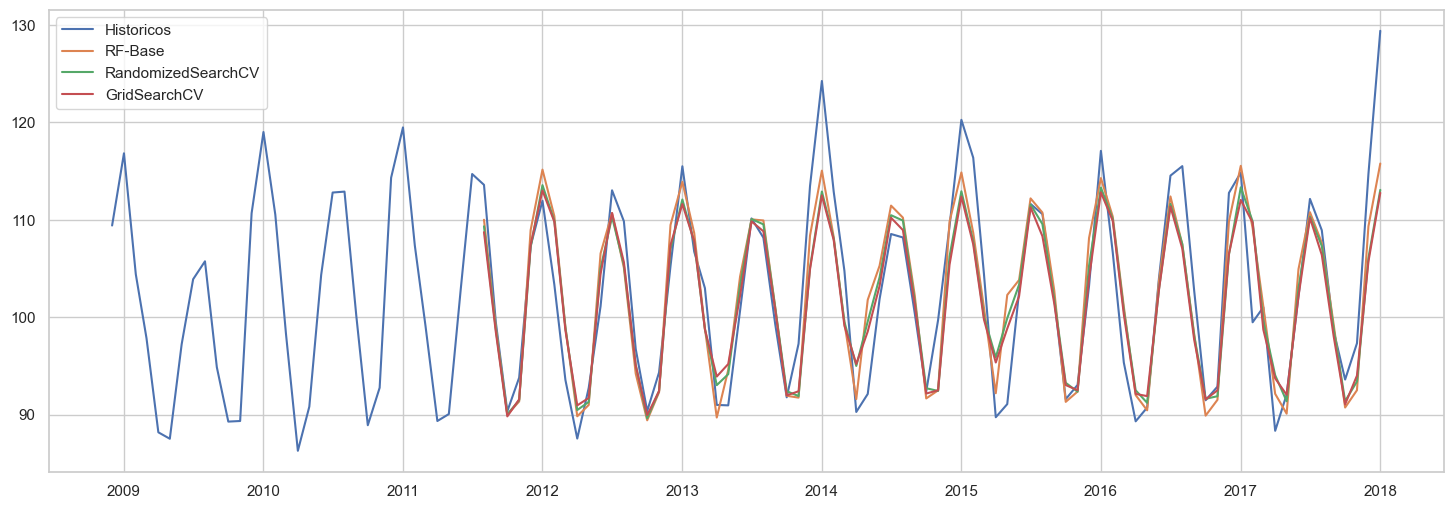

In [57]:
plt.figure(figsize= (18,6))
plt.plot(data.index[-110:], data["Value"][-110:], label = "Historicos")
plt.plot(forecast.index, forecast["RF-Base"], label = "RF-Base")
plt.plot(forecast.index, forecast["RF_RandomizedSearchCV"], label = "RandomizedSearchCV")
plt.plot(forecast.index, forecast["GridSearchCV"], label = "GridSearchCV")
plt.legend()
plt.show()

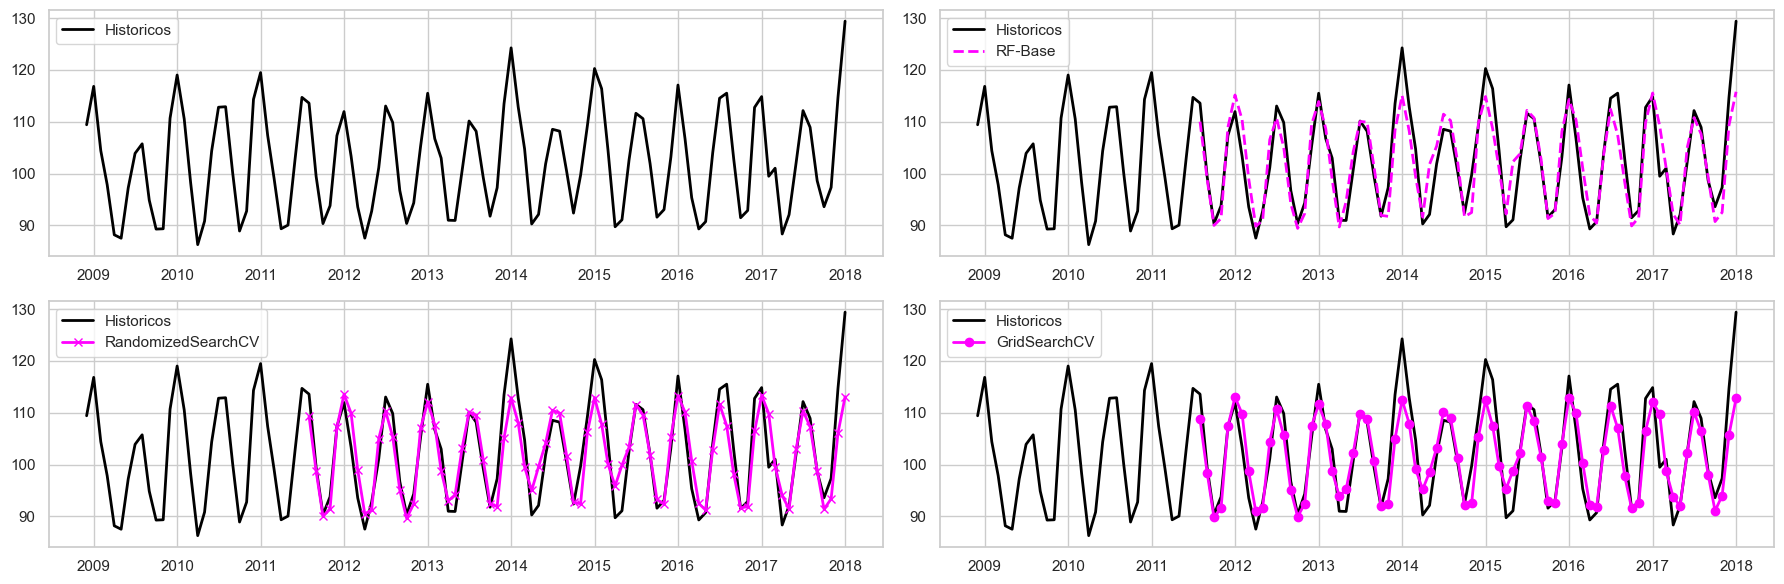

In [58]:
# Crear la figura y los ejes
fig, ax = plt.subplots(2, 2, figsize=(18, 6))

ax[0, 0].plot(data.index[-110:], data["Value"][-110:], label = "Historicos", color = "black", linewidth = 2 ,)
ax[0, 0].legend()

ax[0, 1].plot(data.index[-110:], data["Value"][-110:], label = "Historicos", color = "black", linewidth = 2 ,)
ax[0, 1].plot(forecast.index , forecast["RF-Base"], label = "RF-Base", linestyle='--', linewidth = 2, color = "fuchsia")
ax[0, 1].legend()

ax[1, 0].plot(data.index[-110:], data["Value"][-110:], label = "Historicos", color = "black", linewidth = 2 ,)
ax[1, 0].plot(forecast.index , forecast["RF_RandomizedSearchCV"], label = "RandomizedSearchCV", marker='x', linewidth = 2, color = "fuchsia")
ax[1, 0].legend()

ax[1, 1].plot(data.index[-110:], data["Value"][-110:], label = "Historicos", color = "black", linewidth = 2 ,)
ax[1, 1].plot(forecast.index , forecast["GridSearchCV"], label = "GridSearchCV", marker='o', linewidth = 2, color = "fuchsia")
ax[1, 1].legend()

# Ajustar el layout
plt.tight_layout()
plt.show()

## `HalvingGridSearchCV`

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [64]:
# Crear el modelo
clf3 = RandomForestRegressor()

# Definir el espacio de busquedad
halving_grid_search = {
    'bootstrap': [True],
    'max_depth': range(2, 20, 1),
    'max_features': range(2, 8, 1),
    'min_samples_leaf': range(2, 5, 1),
    'min_samples_split': [8, 10, 12],
    #'n_estimators':  range(100, 2000, 100),
    'criterion': ["squared_error", "r2"] 
}
# crear modelo para el hiperparametro
halving_search = HalvingGridSearchCV(estimator= clf3 , param_grid= halving_grid_search,
                                     resource= 'n_estimators', max_resources= 10,).fit(X_train, y_train)

halving_search

HalvingGridSearchCV(estimator=RandomForestRegressor(), max_resources=10,
                    param_grid={'bootstrap': [True],
                                'criterion': ['squared_error', 'r2'],
                                'max_depth': range(2, 20),
                                'max_features': range(2, 8),
                                'min_samples_leaf': range(2, 5),
                                'min_samples_split': [8, 10, 12]},
                    resource='n_estimators')

In [65]:
halving_search.best_params_

{'bootstrap': True,
 'criterion': 'squared_error',
 'max_depth': 15,
 'max_features': 7,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 9}

In [66]:
best_grid_halving_gs = halving_search.best_estimator_
best_grid_halving_gs

RandomForestRegressor(max_depth=15, max_features=7, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=9)

## `Forecast Halving Grid Search`

In [67]:
pred_rf_halving_gs = best_grid_halving_gs.predict(X_test)
pred_rf_halving_gs

array([108.13052599,  98.5143682 ,  91.30438372,  92.28061098,
       106.05273278, 113.68009008, 110.07091944,  98.61444355,
        90.32126806,  93.85332825, 102.02174532, 109.25021766,
       105.66649932,  96.64850175,  90.33990284,  92.81626061,
       105.77374343, 112.60255545, 108.38028673,  99.12668513,
       102.46157048,  93.25175949, 104.81424154, 108.21688877,
       109.37145935,  99.64040266,  91.74750638,  92.45238717,
       104.87706119, 113.60457484, 109.33372519, 101.51787506,
       103.18450529,  98.53600018, 105.32947389, 107.43376025,
       109.93736713,  99.89916907,  93.35448101,  92.45238717,
       104.88230093, 114.73155539, 109.19695148, 103.2178265 ,
       103.34464529, 100.38303924, 105.66852944, 112.6103973 ,
       110.52729769,  99.89916907,  93.85522272,  92.45238717,
       104.20887204, 114.73155539, 110.61377722,  99.26755685,
        91.04469623,  91.6567827 , 104.21997673, 112.6103973 ,
       108.13052599,  98.17521301,  96.18943239,  92.28

In [69]:
forecast["HalvingGridSearchCV"] = pred_rf_halving_gs
forecast

,Value,RF-Base,RF_RandomizedSearchCV,GridSearchCV,HalvingGridSearchCV
DATE,,,,,
2011-08-01,113.5958,110.012731,109.339543,108.741207,108.130526
2011-09-01,99.4712,98.968409,98.757207,98.471065,98.514368
2011-10-01,90.3566,90.008730,90.046642,89.833000,91.304384
2011-11-01,93.8095,91.361493,91.494824,91.582866,92.280611
2011-12-01,107.3312,108.946287,107.190590,107.428412,106.052733
...,...,...,...,...,...
2017-09-01,98.6154,99.271189,98.837342,98.067515,99.014747
2017-10-01,93.6137,90.742893,91.400006,91.072300,91.975900
2017-11-01,97.3359,92.520507,93.410774,94.019424,92.012084


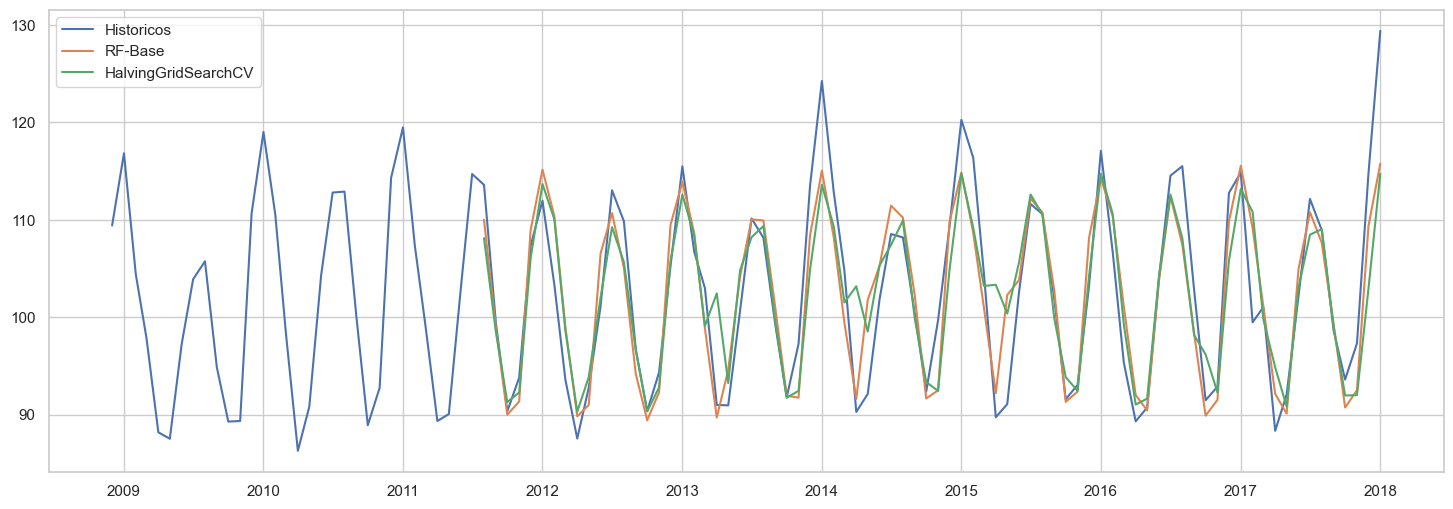

In [70]:
plt.figure(figsize= (18,6))
plt.plot(data.index[-110:], data["Value"][-110:], label = "Historicos")
plt.plot(forecast.index, forecast["RF-Base"], label = "RF-Base")
plt.plot(forecast.index, forecast["HalvingGridSearchCV"], label = "HalvingGridSearchCV")

plt.legend()
plt.show()

## `Performance model con Halving Grid Search

In [71]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print('Testing R2 Score: ', r2_score(y_test, pred_rf_halving_gs)*100)
print('Testing RMSE: ', np.sqrt(mean_squared_error(y_test, pred_rf_halving_gs)))
print('Testing MAE: ', mean_absolute_error(y_test, pred_rf_halving_gs))
print('Testing MSE: ', mean_squared_error(y_test, pred_rf_halving_gs))

Testing R2 Score:  71.95035564966648
Testing RMSE:  5.078922344081474
Testing MAE:  3.6478185279124156
Testing MSE:  25.795452177210052


## `HalvingRandomSearchCV`

In [76]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV


In [84]:
# Crear modelo
clf4 = RandomForestRegressor()

# Definir el espacio de busquedad
halving_random_search = {
    'bootstrap': [True],
    'max_depth': range(2, 20, 1),
    'max_features': range(2, 8, 1),
    'min_samples_leaf': range(2, 5, 1),
    'min_samples_split': [8, 10, 12],
    #'n_estimators':  range(100, 2000, 100),
    'criterion': ["squared_error", "r2"] 
}

In [85]:
# Crear modelo para hiperparametro 
halvin_random = HalvingRandomSearchCV(estimator= clf4 , param_distributions= halving_random_search ,
                                      resource= 'n_estimators', max_resources= 10).fit(X_train, y_train)

In [86]:
best_halving_rs = halvin_random.best_estimator_
best_halving_rs

RandomForestRegressor(max_depth=6, max_features=7, min_samples_leaf=4,
                      min_samples_split=10, n_estimators=9)

## `Forecast Halving Random SearchCV`

In [87]:
pred_rf_halving_rs = best_halving_rs.predict(X_test)
pred_rf_halving_rs

array([106.39640093,  98.07838088,  89.48042926,  89.75868401,
       106.25094808, 114.30677623, 110.7628234 ,  99.02114807,
        89.9730927 ,  89.90186468, 103.23941998, 108.96936618,
       104.08913627,  94.81948235,  89.0997602 ,  90.65041587,
       105.85581395, 112.08049539, 106.88148858,  98.91316628,
        95.7155594 ,  93.58760003, 102.69460897, 108.96936618,
       107.26695962, 101.89906539,  92.69581357,  90.65041587,
       107.13528671, 113.11609109, 108.39244801, 100.02676146,
        98.55868172, 101.62136257, 103.00339627, 108.46061043,
       106.79876888, 101.95237647,  91.55612659,  90.65041587,
       107.13528671, 114.02191317, 109.2163885 ,  99.5803627 ,
       101.2940187 , 101.78148453, 103.00339627, 110.68961554,
       106.31368122, 101.42398712,  94.08626674,  90.65041587,
       105.90028312, 114.30677623, 109.57213826, 101.857367  ,
        92.69581357,  90.65041587, 101.75300072, 110.68961554,
       105.97499369,  97.69565817,  94.41598101,  89.75

In [89]:
forecast["HalvingRandomSearchCV"] = pred_rf_halving_rs
forecast

,Value,RF-Base,RF_RandomizedSearchCV,GridSearchCV,HalvingGridSearchCV,HalvingRandomSearchCV
DATE,,,,,,
2011-08-01,113.5958,110.012731,109.339543,108.741207,108.130526,106.396401
2011-09-01,99.4712,98.968409,98.757207,98.471065,98.514368,98.078381
2011-10-01,90.3566,90.008730,90.046642,89.833000,91.304384,89.480429
2011-11-01,93.8095,91.361493,91.494824,91.582866,92.280611,89.758684
2011-12-01,107.3312,108.946287,107.190590,107.428412,106.052733,106.250948
...,...,...,...,...,...,...
2017-09-01,98.6154,99.271189,98.837342,98.067515,99.014747,100.570414
2017-10-01,93.6137,90.742893,91.400006,91.072300,91.975900,91.393113
2017-11-01,97.3359,92.520507,93.410774,94.019424,92.012084,90.650416


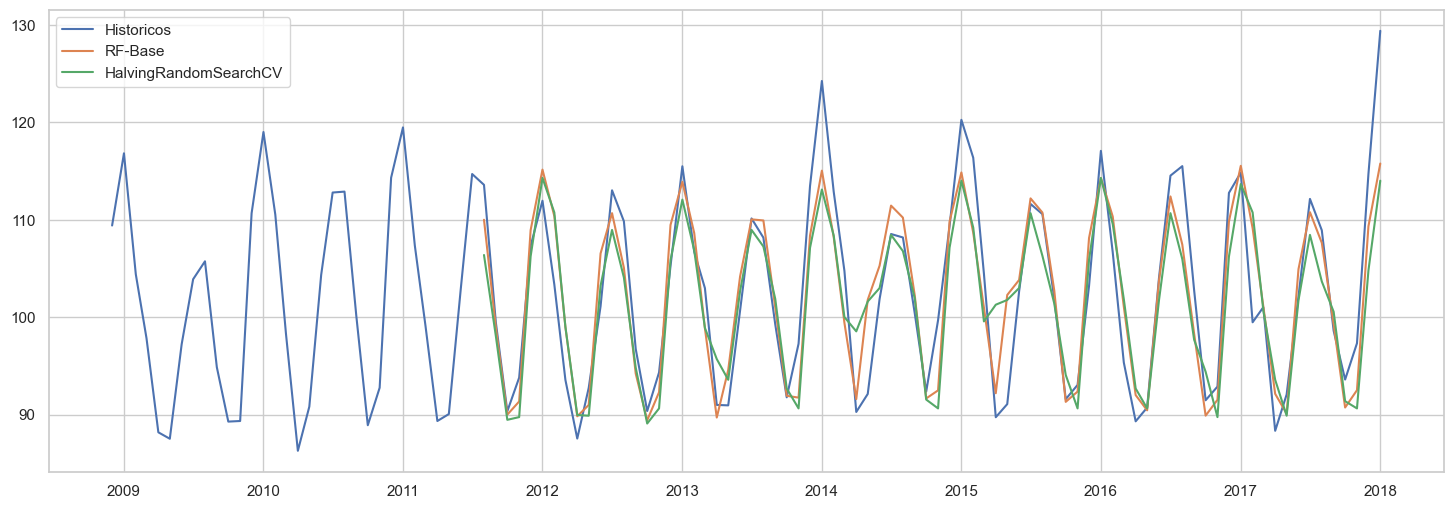

In [90]:
plt.figure(figsize= (18,6))
plt.plot(data.index[-110:], data["Value"][-110:], label = "Historicos")
plt.plot(forecast.index, forecast["RF-Base"], label = "RF-Base")
plt.plot(forecast.index, forecast["HalvingRandomSearchCV"], label = "HalvingRandomSearchCV")

plt.legend()
plt.show()

In [91]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print('Testing R2 Score: ', r2_score(y_test, pred_rf_halving_rs)*100)
print('Testing RMSE: ', np.sqrt(mean_squared_error(y_test, pred_rf_halving_rs)))
print('Testing MAE: ', mean_absolute_error(y_test, pred_rf_halving_rs))
print('Testing MSE: ', mean_squared_error(y_test, pred_rf_halving_rs))

Testing R2 Score:  70.97423892528764
Testing RMSE:  5.166538869480859
Testing MAE:  4.0163946885395765
Testing MSE:  26.69312388985655
